# Импорт данных и зависимостей

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# загружаем датасет
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    download = True,
    train = True,
    transform = transforms.Compose([transforms.ToTensor()]) # преобразование в тензор
)

test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    download=True,
    train=False,
    transform = transforms.Compose([transforms.ToTensor()]) # преобразование в тензор
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



/usr/local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [27]:
train_set.data.shape, test_set.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

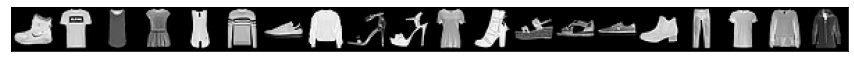

In [28]:
train_loader = torch.utils.data.DataLoader(train_set,batch_size=20) # загрузчик тренировочных данных
test_loader = torch.utils.data.DataLoader(test_set,batch_size=10000)  # загрузчик тестовых данных

images, labels = next(iter(train_loader)) # загружаем батч изображений

grid = torchvision.utils.make_grid(images,nrow=20) # создадим каскад изображений
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)),cmap='gray') # визуализируем каскад изображений
plt.xticks([])
plt.yticks([]);

# Построение модели

In [57]:
import torch.nn as nn
import torch.nn.functional as F

class fashion_model(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5) # конволюционный слой
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5) # конволюционный слой
        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120) # полносвязный слой
        self.fc2 = nn.Linear(in_features=120,out_features=40) # полносвязный слой
        self.out = nn.Linear(in_features=40,out_features=10) # полносвязный слой
    def forward(self,x):
        # входной слой
        x = x
        # первый скрытый слой
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2,stride=2)
        # второй скрытый слой
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2,stride=2)
        # третий скрытый слой
        x = x.reshape(-1,12*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        # четвертый скрытый слой
        x = self.fc2(x)
        x = F.relu(x)
        # выходной слой
        x = self.out(x)
        return x

In [15]:
# определяем параметры модели
model = Network()
optimizer = torch.optim.SGD(model.parameters(),lr=0.005)
loss_func = nn.CrossEntropyLoss()
epochs = 10

#training loop
losses = []
for i in range(epochs):
    for j,(images,targets) in enumerate(train_loader):
    
        y_pred = model(images) # делаем проход вперед по нейронной сети
        loss = loss_func(y_pred,targets.reshape(-1))# вычисляем ошибку
        optimizer.zero_grad()
        loss.backward() # обратное распространение
        optimizer.step() # обновление весов
    if i>8:
        optimizer.lr = 0.001 # уменьешение learning rate
        
    print('epoch {} , loss: {}' .format(i+1, loss))
    losses.append(loss)

epoch 1 , loss: 2.288839340209961
epoch 2 , loss: 0.8473876118659973
epoch 3 , loss: 0.6460629105567932
epoch 4 , loss: 0.5796915888786316
epoch 5 , loss: 0.5018628835678101
epoch 6 , loss: 0.4574618935585022
epoch 7 , loss: 0.4263231158256531
epoch 8 , loss: 0.39516836404800415
epoch 9 , loss: 0.376415491104126
epoch 10 , loss: 0.343829482793808


In [53]:
#accuracy of the model
x_test, y_test = next(iter(test_loader))
y_pred = (model(x_test).argmax(dim=1))
print('Точность на тестовой подвыборке: %.3f ' %(y_pred.eq(y_test).sum()/10000.).item())

Точность на тестовой подвыборке: 0.845 


Text(0, 0.5, 'loss')

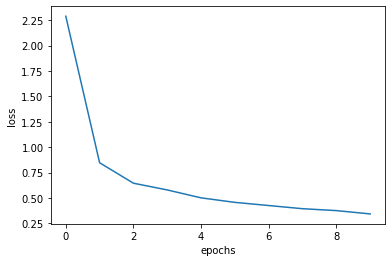

In [17]:
# визуализируем потери
plt.plot(losses)
plt.xlabel('epochs')
plt.ylabel('loss')

This is a/an Bag


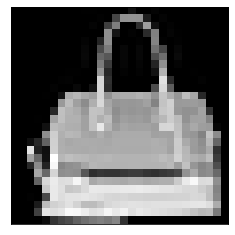

In [56]:
# предсказание для случайной картинки из тестовых данных
rand_no = random.randint(0,10000)
list_ = ['T-shirt/Top', 'Trouser', 'PullOver', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']
plt.imshow(x_test[rand_no].reshape(28,28),cmap='gray') # визуализируем картинку
plt.xticks([])
plt.yticks([])
pred = model(x_test[rand_no].reshape(-1,1,28,28)).argmax() # делаем предсказание
print("This is a/an {}".format(list_[pred]))